In [1]:
br = "\n"

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pprint
import nltk
import folium
from wordcloud import WordCloud

import plotly.graph_objs as go 
import plotly as py
import plotly.express as px
from plotly.offline import init_notebook_mode,iplot,plot
init_notebook_mode(connected=True)


import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon

In [3]:
# p1 = ('/Users/maryyoussef/Desktop/GTD/Clean GTD/GTD_1970_1998_Clean.csv')
# df1 = pd.read_csv(p1)

# p2 = ('/Users/maryyoussef/Desktop/GTD/Clean GTD/GTD_1999_2011_Clean.csv')
# df2 = pd.read_csv(p2)

# p3 = ('/Users/maryyoussef/Desktop/GTD/Clean GTD/GTD_2012_2014_Clean.csv')
# df3 = pd.read_csv(p3)

# p4 = ('/Users/maryyoussef/Desktop/GTD/Clean GTD/GTD_2015_2017_Clean.csv')
# df4 = pd.read_csv(p4)

# p5 = ('/Users/maryyoussef/Desktop/GTD/Clean GTD/GTD_2018_2019_Clean.csv')
# df5 = pd.read_csv(p5)


# dfs = [df1, df2, df3, df4, df5]

# df = pd.concat(dfs)

In [ ]:
from IPython.display import display
from google.colab import drive

drive.mount('/content/drive')

df = pd.read_csv(
   '/content/GDT_2000_2019.csv')

In [4]:
# colnames = list(df.columns)
# #print(colnames)
# df = df.replace(r'^\s*$', np.nan, regex=True)

In [5]:
# df = df[df['iyear'] >= 2000]
# print(df.columns)

Index(['iyear', 'imonth', 'iday', 'country', 'country_txt', 'region',
       'region_txt', 'latitude', 'longitude', 'specificity', 'doubtterr',
       'success', 'suicide', 'attacktype1', 'attacktype1_txt', 'targtype1',
       'targtype1_txt', 'targsubtype1', 'targsubtype1_txt', 'natlty1',
       'natlty1_txt', 'gname', 'motive', 'nperps', 'nperpcap', 'claimed',
       'weaptype1', 'weaptype1_txt', 'weapsubtype1', 'weapsubtype1_txt',
       'nkill', 'nkillus', 'nkillter', 'nwound', 'nwoundus', 'nwoundte',
       'property', 'propextent', 'propextent_txt', 'propvalue', 'ishostkid',
       'nhostkid', 'nhostkidus', 'nhours', 'ndays', 'ransom', 'ransomamt',
       'ransomamtus', 'ransompaid', 'ransompaidus', 'hostkidoutcome',
       'hostkidoutcome_txt', 'nreleased'],
      dtype='object')


In [6]:
#list(df.columns)

In [7]:
# Renaming district names according to loaded data frame

df['country'] = df['country'].replace(['United States'], 'USA-states')

<Figure size 432x288 with 0 Axes>

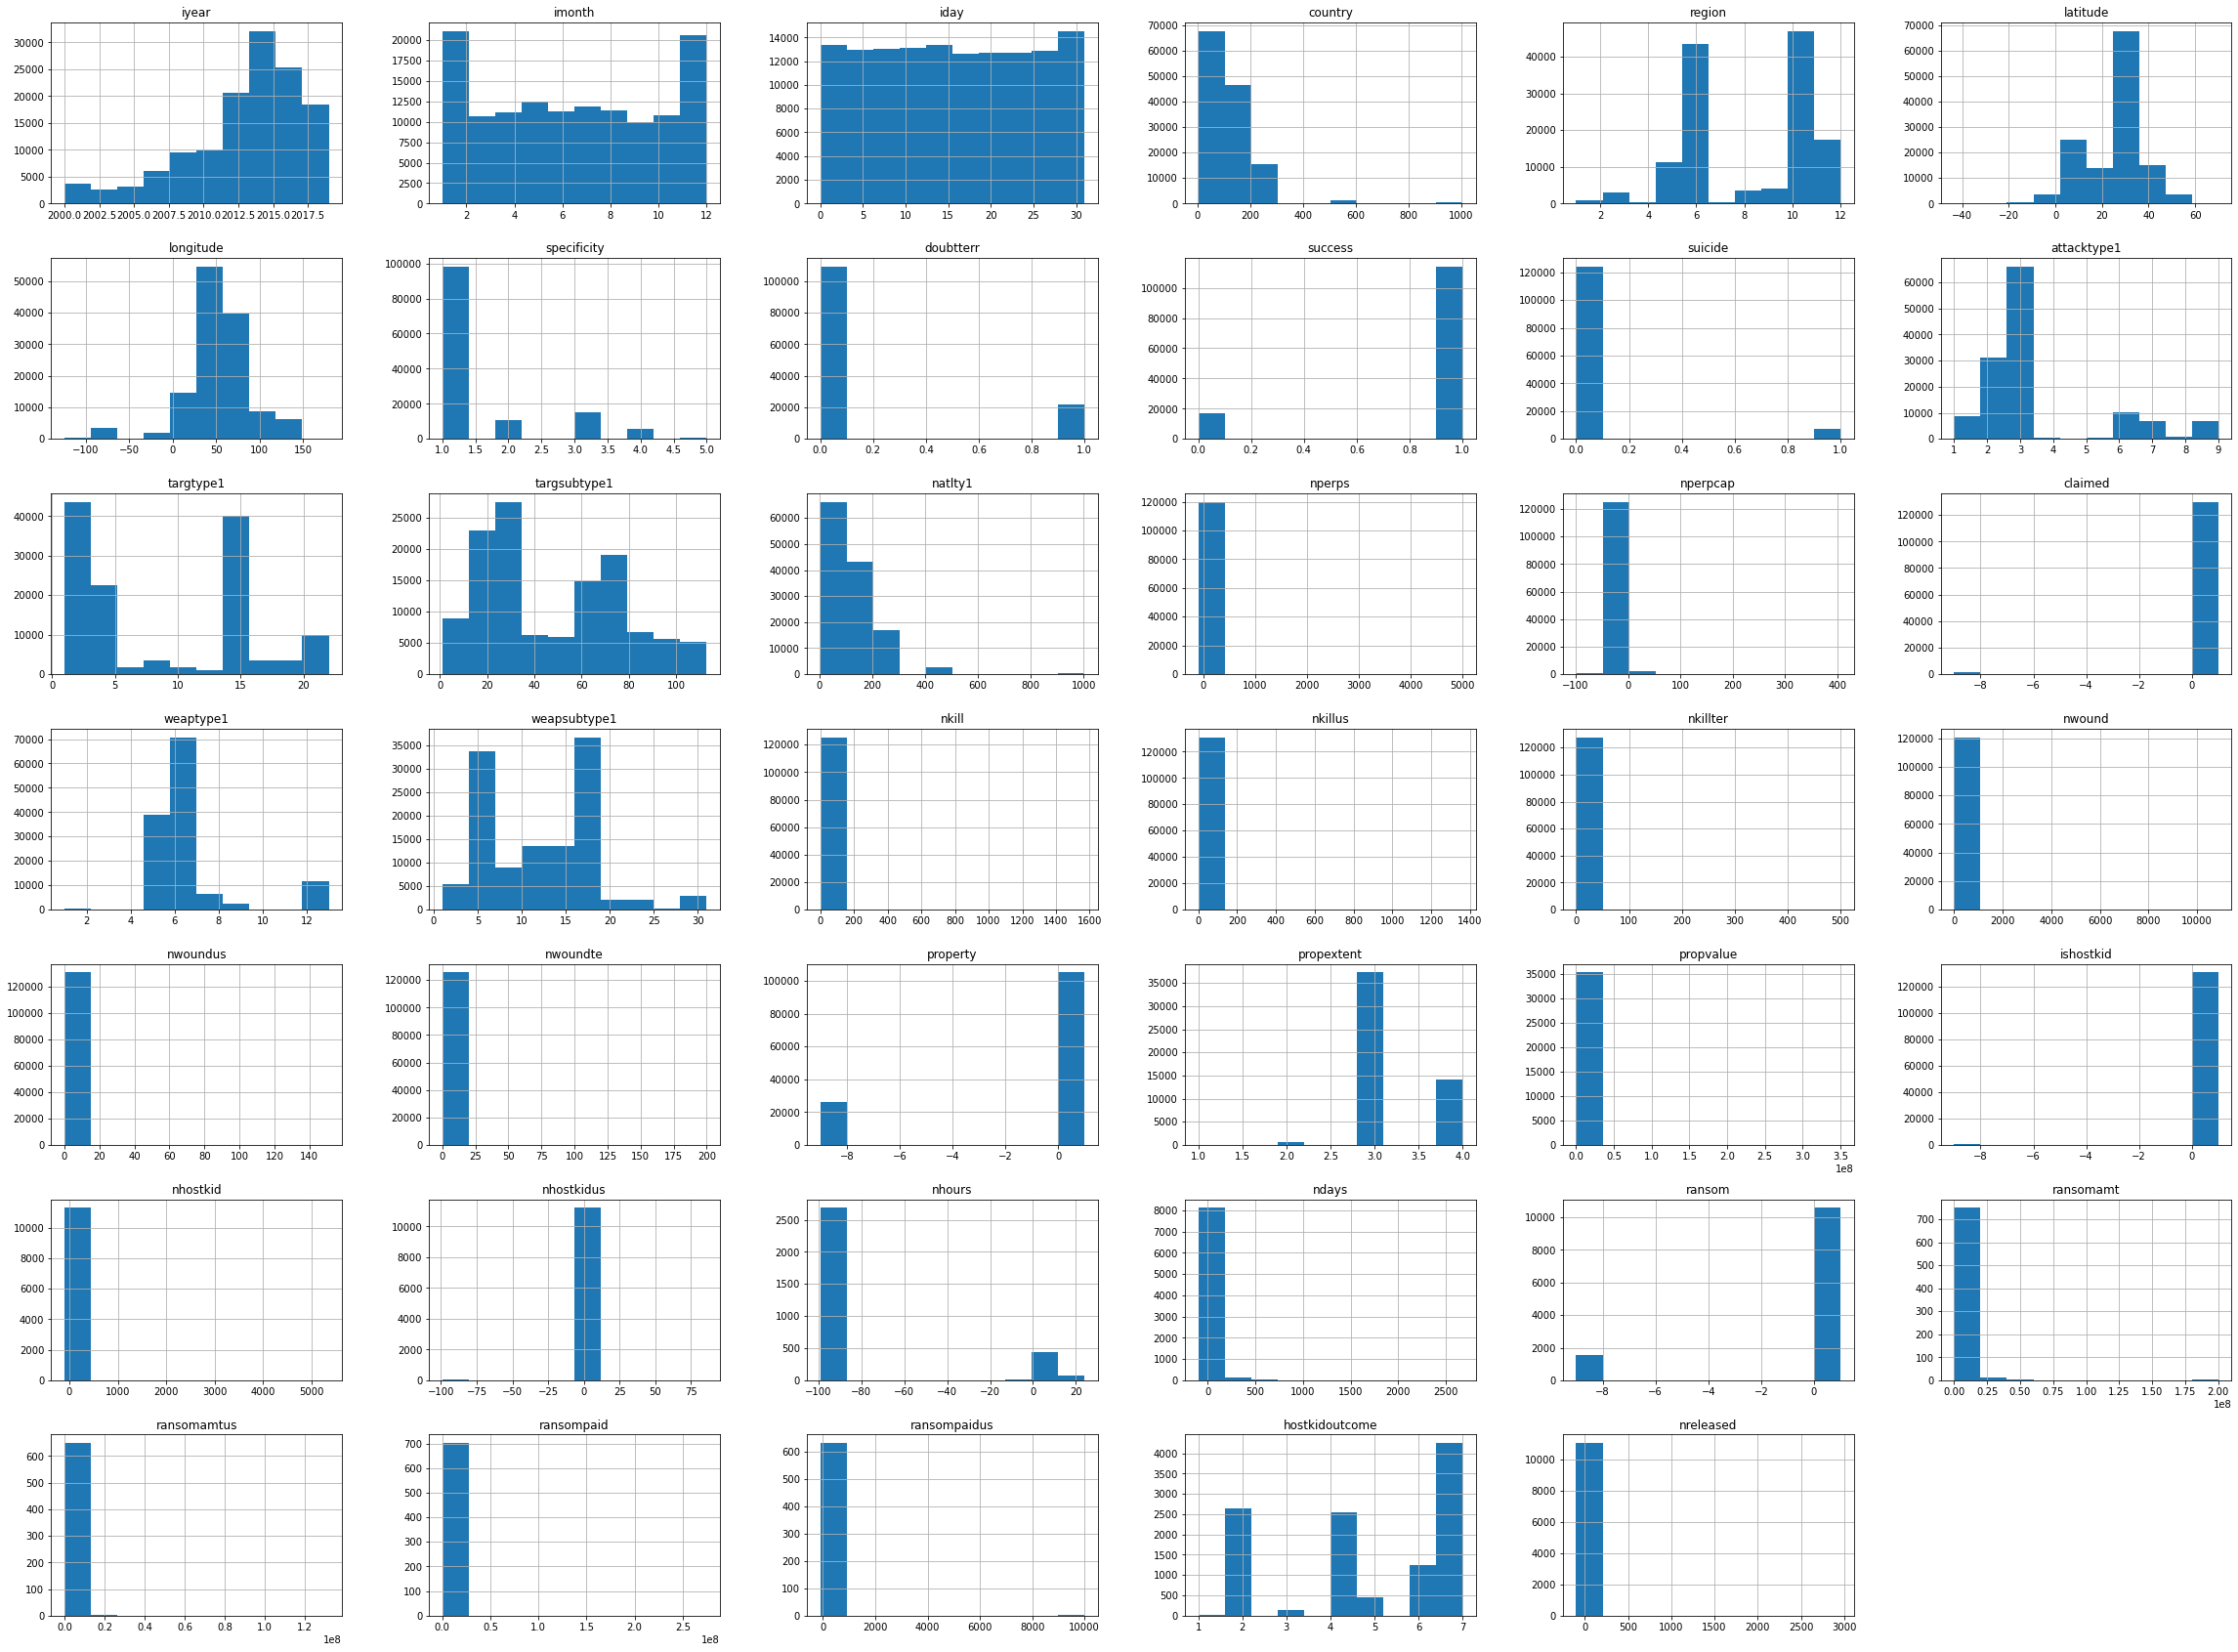

In [8]:
fig3 = plt.figure()
df.hist(figsize=(40,30))
plt.show()

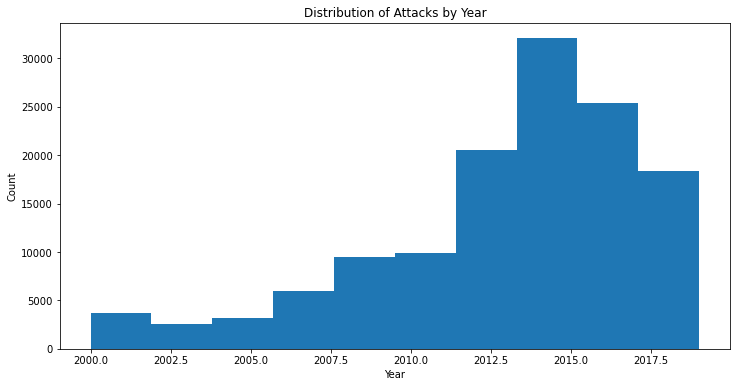

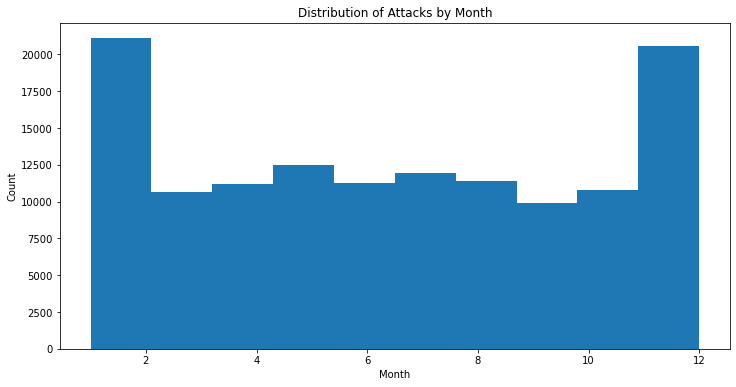

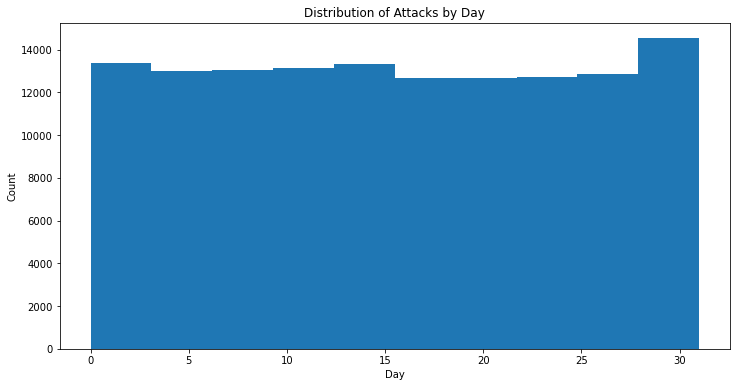

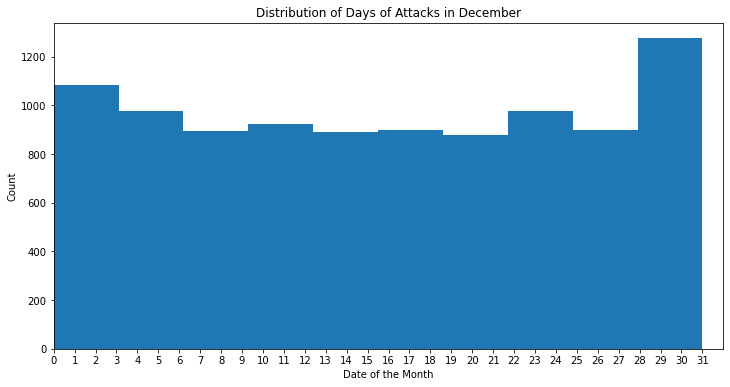

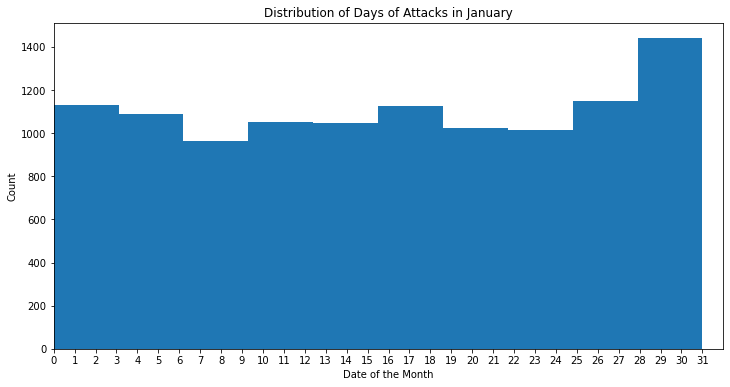

In [9]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.hist(x = df['iyear'])
plt.title('Distribution of Attacks by Year')
plt.xlabel("Year")
plt.ylabel("Count")
#plt.savefig('DistYear.jpg')

fig, ax = plt.subplots(figsize=(12, 6))
ax.hist(x = df['imonth'])
plt.title('Distribution of Attacks by Month')
plt.xlabel("Month")
plt.ylabel("Count")
plt.savefig('DistMonths_CSProj.jpg')


fig, ax = plt.subplots(figsize=(12, 6))
ax.hist(x = df['iday'])
plt.title('Distribution of Attacks by Day')
plt.xlabel("Day")
plt.ylabel("Count")
#plt.savefig('DistDay.jpg')

jan = df[df['imonth'] == 1]
dec = df[df['imonth'] == 12]

fig, ax = plt.subplots(figsize=(12, 6))
ax.hist(x = dec['iday'])
plt.title('Distribution of Days of Attacks in December')
plt.xlabel("Date of the Month")
plt.xticks(np.arange(0, 32))
plt.ylabel("Count")
ax.set_xlim(xmin=0, xmax=32, )
plt.savefig('DistDaysAttacksDec_CSProj.jpg')


fig, ax = plt.subplots(figsize=(12, 6))
ax.hist(x = jan['iday'])
plt.title('Distribution of Days of Attacks in January')
plt.xlabel("Date of the Month")
plt.xticks(np.arange(0, 32))
plt.ylabel("Count")
ax.set_xlim(xmin=0, xmax=32, )
plt.savefig('DistDaysAttacksJan_CSProj.jpg')

Text(0, 0.5, 'Count')

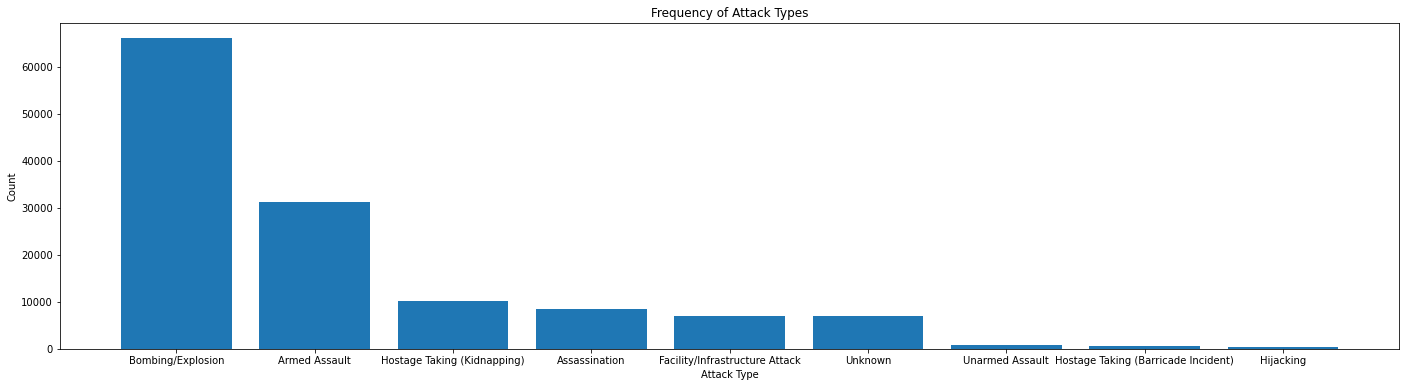

In [10]:
attack = df['attacktype1_txt'].value_counts()
attack = attack.to_dict()


fig = plt.figure(figsize=(24, 6))
plt.bar(x = attack.keys(), height = attack.values(), )
plt.title('Frequency of Attack Types')
plt.xlabel("Attack Type")
plt.ylabel("Count")
# plt.savefig('FreqAttacks.jpg')

# compclaim = df['claimmode_txt'].value_counts()
# compclaim = compclaim.to_dict()


# fig = plt.figure(figsize=(24, 6))
# plt.bar(x = compclaim.keys(), height = compclaim.values(), )
# plt.title('Count of Claim Responsibility')
# plt.xlabel("Claim Mode")
# plt.ylabel("Count")
# plt.savefig('ClaimMode.jpg')

In [11]:
#print(colnames)

In [12]:
df['nkill'] = df['nkill'].fillna(-1)
#print(set(df['nkill']))

df_plot = df[df['nkill'] > 0]
print(len(df_plot))
df_plot = df_plot[df_plot['nwound'].notna()]
print(len(df_plot))

66316
61876


In [13]:
df_plot_top = df_plot.nlargest(4000,'nkill')
#df_plot_top_10 = df_plot.nlargest(10,'nkill')

df_plot_top_10 = df_plot.sort_values(by=['nkill'], ascending=False)
df_plot_top_10 = df_plot_top_10[['iyear', 'imonth', 'iday', 'country_txt', 'nkill', 'attacktype1_txt']]
df_plot_top_10 = df_plot_top_10.drop_duplicates()
df_plot_top_10.head(10)

,iyear,imonth,iday,country_txt,nkill,attacktype1_txt
4696,2001,9,11,United States,1385.0,Hijacking
28463,2014,6,10,Iraq,670.0,Armed Assault
38453,2017,10,14,Somalia,588.0,Bombing/Explosion
7919,2004,3,21,Nepal,518.0,Armed Assault
22461,2016,7,3,Iraq,383.0,Bombing/Explosion
8524,2004,9,1,Russia,344.0,Hostage Taking (Barricade Incident)
9502,2018,12,16,Democratic Republic of the Congo,339.0,Hostage Taking (Kidnapping)
3663,2018,5,15,Afghanistan,330.0,Bombing/Explosion
39522,2017,11,24,Egypt,311.0,Bombing/Explosion
16600,2016,2,7,Iraq,300.0,Hostage Taking (Kidnapping)


In [14]:
get_ipython().run_line_magic('matplotlib', 'inline')

fig = px.scatter_mapbox(df_plot_top, lat="latitude", lon="longitude",zoom=3, height=300, 
                         color='iyear', size = "nkill", color_continuous_scale= 'Rainbow',
                         custom_data = ['country_txt', 'iyear', 'gname', 'nkill', 'nwound', 'targtype1_txt'])

fig.update_traces(
    hovertemplate="<br>".join([
        "City: %{customdata[0]}",
        "Year: %{customdata[1]}",
        "Group Name: %{customdata[2]}",
        "Killed: %{customdata[3]}",
        "Wounded: %{customdata[4]}",
        "Target Type: %{customdata[5]}"
            ]))


fig.update_layout(
    # add a title text for the plot
    title_text = 'Attack Types of Incidents Across the Globe with Magnitude of Nkilled',

    mapbox_style="white-bg",
    mapbox_layers=[
        {   "below": 'traces',
            "sourcetype": "raster",
            "sourceattribution": "United States Geological Survey",
            "source": [
                "https://basemap.nationalmap.gov/arcgis/rest/services/USGSImageryOnly/MapServer/tile/{z}/{y}/{x}"
                ]
            }
          ])
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})

fig.show()

import chart_studio

#    *~*~*~*~*~*~*~*~*~**~*~*~*~*~ ### KEEP THIS ###  *~*~*~*~*~*~*~*~*~**~*~*~*~*~*~*~*~*~*~*~*~*~*~**~*~*~*~*~

# username = 'mry8ea' # your username
# api_key = 'QPR3L9tJz8eTSJkuvdzN' # your api key - go to profile > settings > regenerate key
# chart_studio.tools.set_credentials_file(username=username, api_key=api_key)

# import chart_studio.plotly as py
# py.plot(fig, filename = 'CS5010 GTD Project', auto_open=True)

In [15]:
#nwound_iyear = df.groupby('iyear')['nwound'].sum()

# df['nkill_iyear'] = df['iyear'].map(nkill_iyear)
# df['nwound_iyear'] = df['iyear'].map(nwound_iyear)


nkill_iyear_country = df.groupby(['iyear', 'country_txt'])['nkill'].sum()
nkill_iyear_country = nkill_iyear_country.reset_index()

nkill_iyear_country = nkill_iyear_country[nkill_iyear_country['nkill'] > 0]

print(nkill_iyear_country['nkill'].min())

top_nkilled = nkill_iyear_country.sort_values(by=['nkill'], ascending=False)
top_nkilled.head(15)

1.0


,iyear,country_txt,nkill
1160,2014,Iraq,13799.0
1363,2016,Iraq,12114.0
1530,2018,Afghanistan,9685.0
1259,2015,Iraq,8769.0
1639,2019,Afghanistan,8180.0
1188,2014,Nigeria,7703.0
1067,2013,Iraq,7002.0
569,2007,Iraq,6660.0
1465,2017,Iraq,6481.0
1221,2015,Afghanistan,6129.0


In [16]:
nkill_iyear_country = df.groupby(['iyear', 'country_txt'])['nkill'].sum()
nkill_iyear_country = nkill_iyear_country.reset_index()
#nkill_iyear_country.head()

# #    *~*~*~*~*~*~*~*~*~**~*~*~*~*~ ### KEEP THIS ###  *~*~*~*~*~*~*~*~*~**~*~*~*~*~*~*~*~*~*~*~*~*~*~**~*~*~*~*~

max_nkill = nkill_iyear_country.nkill.max()
#print(max_nkill)

import plotly.express as px
gapminder = px.data.gapminder()
fig = px.choropleth(nkill_iyear_country,               
              locations="country_txt",
              locationmode = "country names",             
              color="nkill",
              hover_name="country_txt",  
              animation_frame="iyear"  ,     
              color_continuous_scale='Rainbow',  
              height=600 ,
                range_color= (0, max_nkill))   

fig.update_layout(
    # add a title text for the plot
    title_text = 'Number Killed by Terrorist Acts')


fig.show()

# #    *~*~*~*~*~*~*~*~*~**~*~*~*~*~ ### KEEP THIS ###  *~*~*~*~*~*~*~*~*~**~*~*~*~*~*~*~*~*~*~*~*~*~*~**~*~*~*~*~


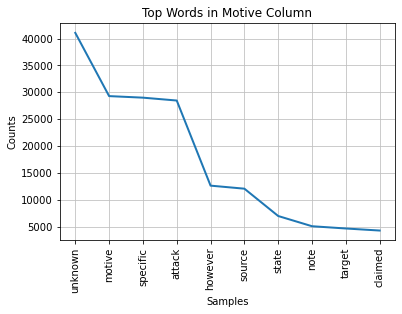

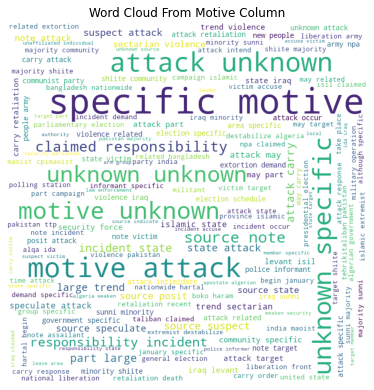

In [17]:
from nltk.stem import WordNetLemmatizer 
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from wordcloud import WordCloud


def TextAnalysis(column):
    # Putting all of column content to 1 string
    
    df[column] = df[column].str.lower()
    
    sentence = df[column].tolist()
    sentence = str(sentence)

    # Initializing punctuations string  
    punc = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''
  
    # Removing punctuations in string 
    # Using loop + punctuation string   
    for ele in sentence:  
        if ele in punc:  
            sentence = sentence.replace(ele, "")     
    
    # Tokenizing word to remove stop words
    tokenized_word=word_tokenize(sentence)
   
    # Remove stop words and adding nan and al from empty values and city name
    stop_words=set(stopwords.words("english"))
    stop_words.add('nan')
    
    # Filtering sentence to remove stop words
    filtered_sent=[]
    for w in tokenized_word:
        if w not in stop_words:
            filtered_sent.append(w)
    
    # Lemmatize with POS Tag --> https://www.machinelearningplus.com/nlp/lemmatization-examples-python/
    def get_wordnet_pos(word):
        """Map POS tag to first character lemmatize() accepts"""
        tag = nltk.pos_tag([word])[0][1][0].upper()
        tag_dict = {"J": wordnet.ADJ,
                    "N": wordnet.NOUN,
                    "V": wordnet.VERB,
                    "R": wordnet.ADV}

        return tag_dict.get(tag, wordnet.NOUN)

    # Making filtered sentence single string to lemmatize
    filtered_sent = ' '.join(filtered_sent)
    
    # Init Lemmatizer
    lemmatizer = WordNetLemmatizer()

    # Lemmatize string with the appropriate POS tag
    sentfinal = ([lemmatizer.lemmatize(w, get_wordnet_pos(w)) for w in nltk.word_tokenize(filtered_sent)])
    #print(sentfinal)

    # Print freq of words in final clean sentence
    fdist = FreqDist(sentfinal)
    
    # Making sentence a string from a list for word cloud
    str_sentfinal = ' '.join(map(str, sentfinal))
     
    #Printing top 5 most common words and freq.
    #print(fdist.most_common(5))
    
    fig1 = plt.figure()
    
    # Plotting top 30 words
    title = "Top Words in {} Column".format(column.capitalize())
    fdist.plot(10, cumulative=False, title=title)
    plt.title(title)
    fdist_fig_name = str(column) + '_fdist.jpg'  
    #fig1.savefig(fdist_fig_name, bbox_inches = "tight")

    # if using a Jupyter notebook, include:
    %matplotlib inline

    wordcloud = WordCloud(width = 700, height = 700, 
                    background_color ='white', 
                    min_font_size = 10).generate(str_sentfinal) 

    
    # plot the WordCloud image                        
    plt.figure(figsize = (5, 5), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
    titlewc = "Word Cloud From {} Column".format(column.capitalize())
    plt.title(titlewc)
    wc_fig_name = str(column) + '_wordcloud.jpg'
    #plt.savefig(wc_fig_name)
    plt.show()
    
    
#motive, target1, scite1, propcomment
TextAnalysis('motive')

In [22]:
findword = 'claimed'
numwords = 50
claimed = []

# Making entire column single string to analyze
summs = df['motive'].tolist()
summs = str(summs)

# Printing numwords words before and after word claimed if found
for i in summs.split('\n'):
    z = i.split(' ')

    for x in [x for (x, y) in enumerate(z) if findword in y]:
        claimed.append(' '.join(z[max(x-numwords,0):x+numwords+1]))
        
#pprint.pprint(claimed)

however = []
other = []
howev = 'however'

#If word has claimed, looking into which attacks had 'no group'

for i in claimed: 
    if howev in i:
        however.append(i)
    else:
        other.append(i)

#pprint.pprint(however)

# f= open("CS5010_however.txt","w+")
# f.write(repr(however))
# f.close()

In [21]:
# code for all events - above has only has top 4000 events by nkilled

# get_ipython().run_line_magic('matplotlib', 'inline')

# fig = px.scatter_mapbox(df_plot, lat="latitude", lon="longitude",zoom=3, height=300, 
#                          color='iyear', size = "nkill", color_continuous_scale= 'Rainbow',
#                          custom_data = ['country_txt', 'iyear', 'gname', 'nkill', 'nwound', 'targtype1_txt'])

# fig.update_traces(
#     hovertemplate="<br>".join([
#         "City: %{customdata[0]}",
#         "Year: %{customdata[1]}",
#         "Group Name: %{customdata[2]}",
#         "Killed: %{customdata[3]}",
#         "Wounded: %{customdata[4]}",
#         "Target Type: %{customdata[5]}"
#             ]))


# fig.update_layout(
#     # add a title text for the plot
#     title_text = 'Attack Types of Incidents Across the Globe with Magnitude of Nkilled',

#     mapbox_style="white-bg",
#     mapbox_layers=[
#         {   "below": 'traces',
#             "sourcetype": "raster",
#             "sourceattribution": "United States Geological Survey",
#             "source": [
#                 "https://basemap.nationalmap.gov/arcgis/rest/services/USGSImageryOnly/MapServer/tile/{z}/{y}/{x}"
#                 ]
#             }
#           ])
# fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})

# fig.show()

# import chart_studio

# #    *~*~*~*~*~*~*~*~*~**~*~*~*~*~ ### KEEP THIS ###  *~*~*~*~*~*~*~*~*~**~*~*~*~*~*~*~*~*~*~*~*~*~*~**~*~*~*~*~

# # username = 'mry8ea' # your username
# # api_key = 'QPR3L9tJz8eTSJkuvdzN' # your api key - go to profile > settings > regenerate key
# # chart_studio.tools.set_credentials_file(username=username, api_key=api_key)

# # import chart_studio.plotly as py
# # py.plot(fig, filename = 'CS5010 GTD Project', auto_open=True)